In [4]:
getwd()

[1] "/home/strawperry/Documents/Masters/hacat_cells"

In [2]:
library(tidyverse)
# library(ggpubr)
library(dunn.test)

In [6]:
dmso_dilution_df <- read_tsv("dmso_dilution.df.tsv")
head(dmso_dilution_df)

Rows: 56 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): N_cells, DMSO_dilution, RF_blanked
lgl (1): Rel_viability

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


N_cells,DMSO_dilution,RF_blanked,Rel_viability
<dbl>,<dbl>,<dbl>,<lgl>
20,0,5688.603,NA
30,0,7364.919,NA
40,0,7418.545,NA
50,0,6336.295,NA
60,0,8297.309,NA
70,0,8979.864,NA


In [8]:
dmso_dilution_df <- dmso_dilution_df %>%
  group_by(N_cells) %>%
  mutate(
    Rel_viability = (RF_blanked / RF_blanked[DMSO_dilution == 0]) * 100
  ) %>%
  ungroup()
head(dmso_dilution_df)
tail(dmso_dilution_df)

N_cells,DMSO_dilution,RF_blanked,Rel_viability
<dbl>,<dbl>,<dbl>,<dbl>
20,0,5688.603,100
30,0,7364.919,100
40,0,7418.545,100
50,0,6336.295,100
60,0,8297.309,100
70,0,8979.864,100


N_cells,DMSO_dilution,RF_blanked,Rel_viability
<dbl>,<dbl>,<dbl>,<dbl>
80,20,14752.90,285.7190
80,30,16619.75,321.8743
80,40,17698.93,342.7746
80,50,18604.92,360.3209
80,60,16726.03,323.9326
80,70,17547.86,339.8489


In [19]:
cell_colors <- c(
  "20" = "#1b9e77",  # teal
  "30" = "#d95f02",  # orange
  "40" = "#7570b3",  # purple
  "50" = "#e7298a",  # pink
  "60" = "#66a61e",  # green
  "70" = "#e6ab02",  # yellow
  "80" = "#a6761d"   # brown
)


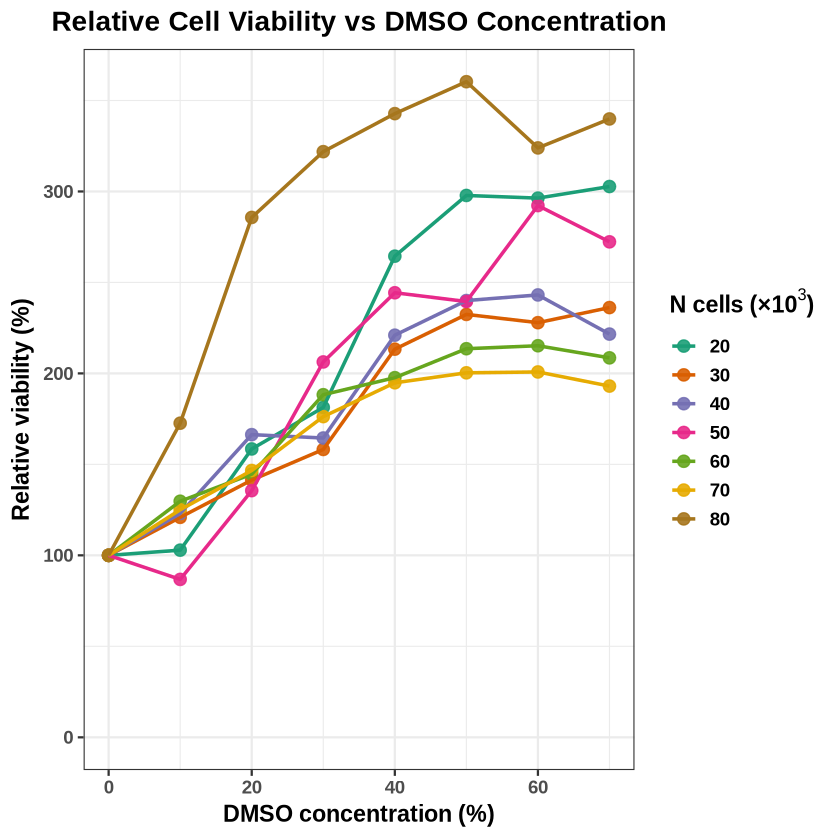

In [22]:
ggplot(dmso_dilution_df, aes(x = DMSO_dilution, y = Rel_viability, color = as.factor(N_cells))) +
  geom_point(size = 3, alpha = 0.9) +
  geom_line(linewidth = 1) +
  scale_color_manual(values = cell_colors, name = expression(bold("N cells (×10"^3*")"))) +
  theme_bw(base_size = 14) +
  theme(
    text = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    title = "Relative Cell Viability vs DMSO Concentration",
    x = "DMSO concentration (%)",
    y = "Relative viability (%)"
  ) +
  ylim(0, NA)

In [23]:
ggsave("DMSO_viability_by_Ncells.png", width = 8, height = 8)

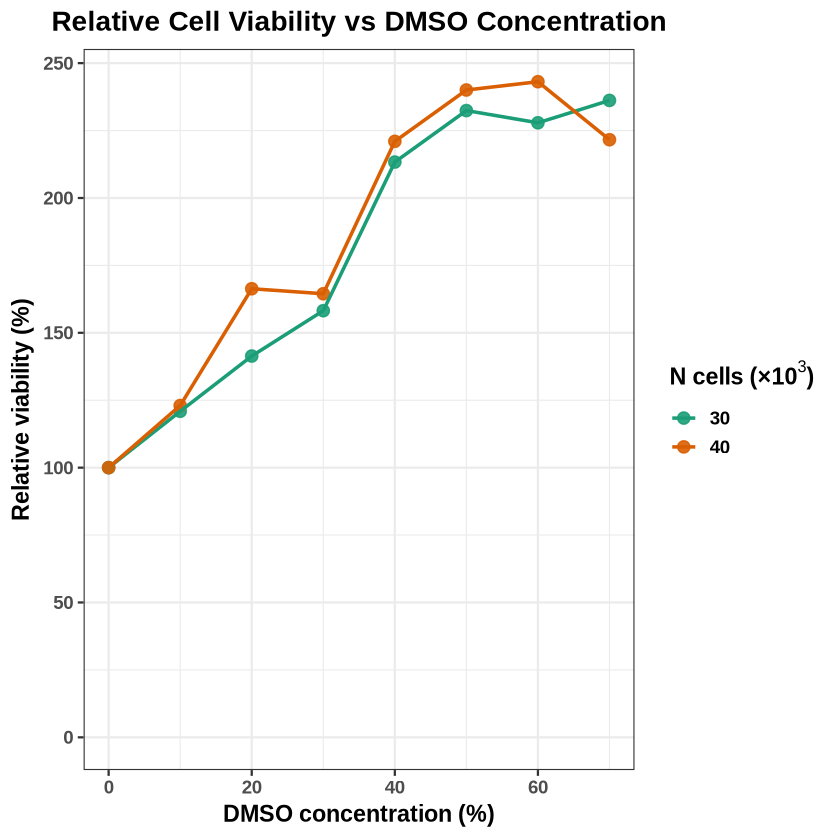

In [12]:
# ---- 3. Filter for N_cells = 30 or 40 ----
dmso_subset <- dmso_dilution_df %>%
  filter(N_cells %in% c(30, 40))

# ---- 4. Plot (no smoothing, all text bold, theme_bw) ----
ggplot(dmso_subset, aes(x = DMSO_dilution, y = Rel_viability, color = as.factor(N_cells))) +
  geom_point(size = 3, alpha = 0.9) +
  geom_line(linewidth = 1) +
  scale_color_brewer(palette = "Dark2", name = expression(bold("N cells (×10"^3*")"))) +
  theme_bw(base_size = 14) +
  theme(
    text = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  labs(
    title = "Relative Cell Viability vs DMSO Concentration",
    x = "DMSO concentration (%)",
    y = "Relative viability (%)"
  ) +
  ylim(0, NA)


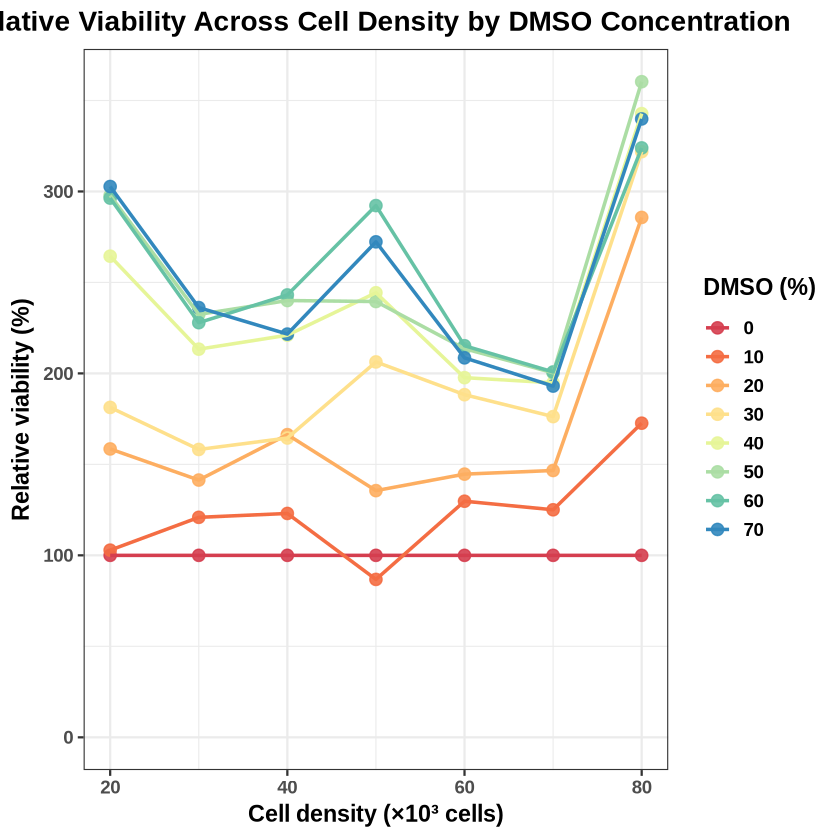

In [14]:
ggplot(dmso_dilution_df, aes(x = N_cells, y = Rel_viability, color = as.factor(DMSO_dilution))) +
  geom_point(size = 3, alpha = 0.9) +
  geom_line(linewidth = 1) +
  theme_bw(base_size = 14) +
  theme(
    text = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  scale_color_brewer(palette = "Spectral", name = expression(bold("DMSO (%)"))) +
  labs(
    title = "Relative Viability Across Cell Density by DMSO Concentration",
    x = "Cell density (×10³ cells)",
    y = "Relative viability (%)"
  ) +
  ylim(0, NA)

In [15]:
ggsave("DMSO_viability_by_Ncells2.png", width = 8, height = 8)

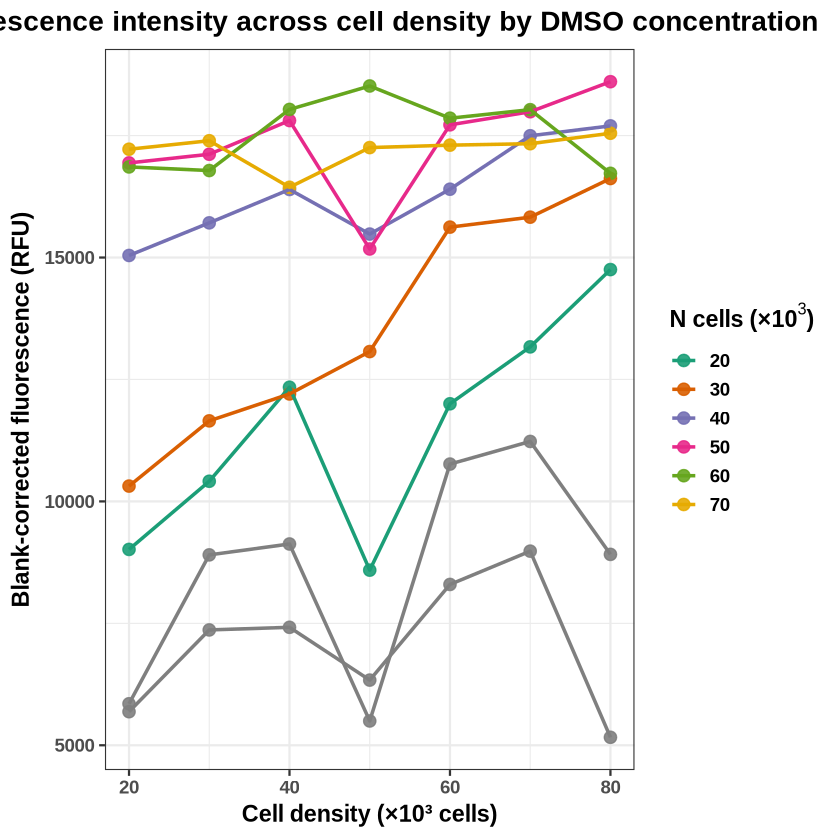

In [24]:
ggplot(dmso_dilution_df, aes(x = N_cells, y = RF_blanked, color = as.factor(DMSO_dilution))) +
  geom_point(size = 3, alpha = 0.9) +
  geom_line(linewidth = 1) +
  theme_bw(base_size = 14) +
  theme(
    text = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  scale_color_manual(values = cell_colors, name = expression(bold("N cells (×10"^3*")"))) +
  labs(
    title = "Fluorescence intensity across cell density by DMSO concentration",
    x = "Cell density (×10³ cells)",
    y = "Blank-corrected fluorescence (RFU)"
  )


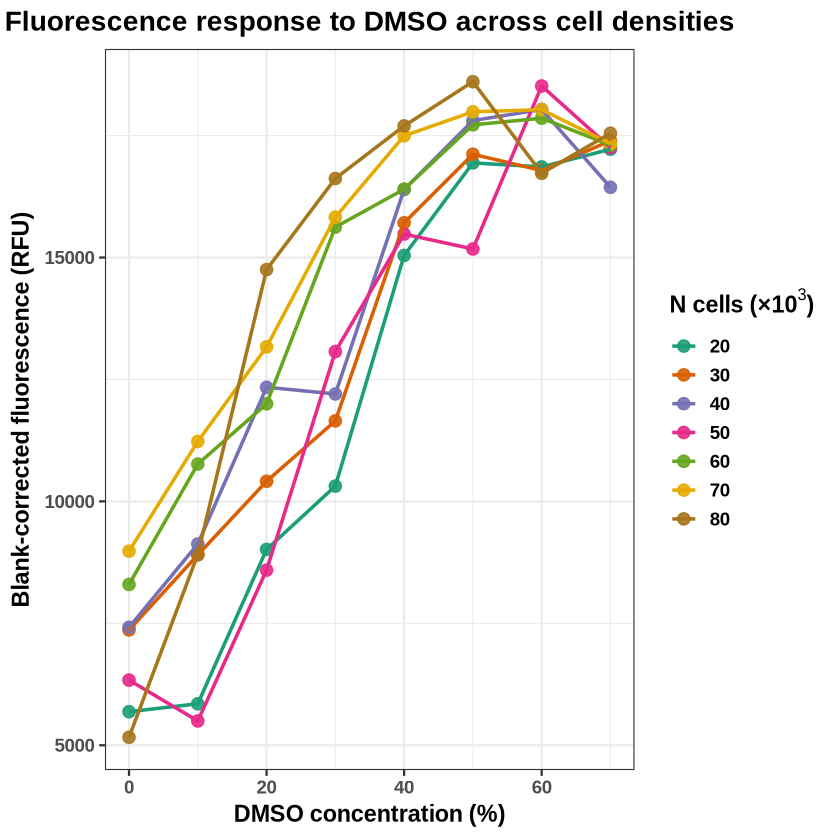

In [25]:
ggplot(dmso_dilution_df, aes(x = DMSO_dilution, y = RF_blanked, color = as.factor(N_cells))) +
  geom_point(size = 3, alpha = 0.9) +
  geom_line(linewidth = 1) +
  theme_bw(base_size = 14) +
  theme(
    text = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(face = "bold"),
    plot.title = element_text(face = "bold", hjust = 0.5)
  ) +
  scale_color_manual(values = cell_colors, name = expression(bold("N cells (×10"^3*")"))) +
  labs(
    title = "Fluorescence response to DMSO across cell densities",
    x = "DMSO concentration (%)",
    y = "Blank-corrected fluorescence (RFU)"
  )

In [26]:
ggsave("DMSO_absoluteRFU_by_Ncells.png", width = 8, height = 8)